In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import nltk
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import string
import regex as re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter


In [35]:
import requests

url = "https://google-news.p.rapidapi.com/v1/search"

querystring = {"q":"libraries","country":"US","from":"2020-07-01","to":"2021-01-03","lang":"en"}

headers = {
    'x-rapidapi-key': "360233f9f2msh3103b621d584f1cp1bc3dejsne40f50384b70",
    'x-rapidapi-host': "google-news.p.rapidapi.com"
    }


In [36]:

response = requests.request("GET", url, headers=headers, params=querystring)


In [37]:
import json
info = response.json()

with open('data.json', 'w') as fp:
    json.dump(info, fp)

f = open('data.json',)

data = json.load(f)

In [38]:
# data
lib_dat = json.dumps(data, indent=4)

In [39]:
print(lib_dat)

{
    "feed": {
        "title": "\"libraries after:2020-07-01 before:2021-01-03\" - Google News",
        "updated": "Mon, 04 Jan 2021 00:16:44 GMT",
        "link": "https://news.google.com/search?q=libraries+after:2020-07-01+before:2021-01-03&ceid=US:en&hl=en-US&gl=US",
        "language": "en-US",
        "subtitle": "Google News",
        "rights": "2021 Google Inc."
    },
    "articles": [
        {
            "id": "CBMidmh0dHBzOi8vd3d3LmNpdGl6ZW5zdm9pY2UuY29tL2xpZmVzdHlsZXMvbGl0dGxlLWxpYnJhcmllcy1iaWctZHJlYW1zL2FydGljbGVfYjNhMGZiNzItZTBiOS01ZjU2LTgzOTItM2VlZGNjNDYzOTNmLmh0bWzSAQA",
            "title": "Little libraries, big dreams | Arts & Living | citizensvoice.com - Wilkes-Barre Citizens Voice",
            "link": "https://www.citizensvoice.com/lifestyles/little-libraries-big-dreams/article_b3a0fb72-e0b9-5f56-8392-3eedcc46393f.html",
            "published": "Sun, 03 Jan 2021 05:15:00 GMT",
            "sub_articles": [],
            "source": {
                "href": "h

In [40]:
normlibdata = pd.json_normalize(data, record_path=['articles'])

In [41]:
normlibdata.head()
# 100 articles

,id,title,link,published,sub_articles,source.href,source.title
0,CBMidmh0dHBzOi8vd3d3LmNpdGl6ZW5zdm9pY2UuY29tL2...,"Little libraries, big dreams | Arts & Living |...",https://www.citizensvoice.com/lifestyles/littl...,"Sun, 03 Jan 2021 05:15:00 GMT",[],https://www.citizensvoice.com,Wilkes-Barre Citizens Voice
1,CBMipgFodHRwczovL3d3dy5qb2huc29uY2l0eXByZXNzLm...,5 Questions: New director brings new energy to...,https://www.johnsoncitypress.com/living/featur...,"Sun, 03 Jan 2021 03:00:00 GMT",[],https://www.johnsoncitypress.com,Johnson City Press (subscription)
2,CBMibGh0dHBzOi8vd3d3LjhuZXdzbm93LmNvbS92aWRlby...,Libraries to reopen Jan. 4 at 25% capacity fol...,https://www.8newsnow.com/video/libraries-to-re...,"Sat, 02 Jan 2021 18:08:53 GMT",[],https://www.8newsnow.com,KLAS - 8 News Now
3,CBMia2h0dHBzOi8vd3d3Lndwci5vcmcvcGVyc29uLXNlcn...,"With In-Person Services Limited, Wisconsin's L...",https://www.wpr.org/person-services-limited-wi...,"Wed, 30 Dec 2020 08:32:21 GMT",[],https://www.wpr.org,Wisconsin Public Radio News
4,CBMiemh0dHA6Ly93d3cuYWxhLm9yZy9uZXdzL21lbWJlci...,12 rural public libraries selected to receive ...,http://www.ala.org/news/member-news/2020/12/12...,"Mon, 14 Dec 2020 08:00:00 GMT",[],http://www.ala.org,ala.org


In [42]:
len(normlibdata)

100

In [43]:
normlibdata.to_csv('organized_data_lib_p2.csv')

In [44]:
# normlibdata.sort_values(by=['published'])
# normlibdata.dtypes
'''
id              object
title           object
link            object
published       object
sub_articles    object
source.href     object
source.title    object
dtype: object
'''

'\nid              object\ntitle           object\nlink            object\npublished       object\nsub_articles    object\nsource.href     object\nsource.title    object\ndtype: object\n'

In [45]:
normlibdata['published'] = pd.to_datetime(normlibdata['published'])

In [46]:
normlibdata.sort_values(by=['published']).head()

,id,title,link,published,sub_articles,source.href,source.title
76,CBMicmh0dHBzOi8vbmV3cy5wc3UuZWR1L3N0b3J5LzY0MT...,Libraries publishes open-access bibliography f...,https://news.psu.edu/story/641100/2020/12/04/a...,2020-12-04 08:00:00+00:00,[],https://news.psu.edu,Penn State News
31,CBMie2h0dHA6Ly93d3cuYWxhLm9yZy9uZXdzL3ByZXNzLX...,"Actress, author and activist Natalie Portman t...",http://www.ala.org/news/press-releases/2020/12...,2020-12-07 08:00:00+00:00,[],http://www.ala.org,ala.org
24,CBMiRWh0dHBzOi8vbmV3c2NlbnRlci5zZHN1LmVkdS9zZH...,SDSU Expands Research Resources Through Consor...,https://newscenter.sdsu.edu/sdsu_newscenter/ne...,2020-12-07 08:00:00+00:00,[],https://newscenter.sdsu.edu,SDSU Newscenter
81,CBMieGh0dHBzOi8vbmV3cy5wc3UuZWR1L3N0b3J5LzY0MT...,Libraries' virtual De-Stress Fest open to all ...,https://news.psu.edu/story/641180/2020/12/07/a...,2020-12-07 08:00:00+00:00,[],https://news.psu.edu,Penn State News
59,CBMiV2h0dHA6Ly93d3cuYWxhLm9yZy9uZXdzL21lbWJlci...,Grounding library work in community engagement...,http://www.ala.org/news/member-news/2020/12/gr...,2020-12-07 08:00:00+00:00,[],http://www.ala.org,ala.org


In [47]:
punc_titles=list(normlibdata['title'])

In [48]:
punc_titles

['Little libraries, big dreams | Arts & Living | citizensvoice.com - Wilkes-Barre Citizens Voice',
 '5 Questions: New director brings new energy to Unicoi County library - Johnson City Press (subscription)',
 'Libraries to reopen Jan. 4 at 25% capacity following temporary closure Toggle header content - KLAS - 8 News Now',
 "With In-Person Services Limited, Wisconsin's Libraries Check Out New Ways To Reach Their Communities - Wisconsin Public Radio News",
 '12 rural public libraries selected to receive funding to offer bilingual exhibitions and STEAM programming - ala.org',
 'Little Chute, Kimberly public libraries go separate ways in amicable split - Post-Crescent',
 "2020's Top Ebooks and Audiobooks from Public Libraries Reflect Interest in Social Justice - PRNewswire",
 'Why are we closing libraries but not bars? - Cambridge Day',
 'Libraries nationwide saw an increased demand for race-related books in 2020 - WDVM 25',
 'Who’s reading what, Boise? Here are library’s most popular boo

In [49]:
# x = 'Primary Research Group has published the Survey of Academic Library Leadership: Re-opening the Library, 2021 Edition, ISBN 978-1-57440- 657-3 - APN News'
# y = re.sub(r'[\d+\p{P}]', '', x)
# print(y)
# [\d+\p{P}]
clean_titles=[]
for x in punc_titles:
    y = re.sub(r'[\d+\W\p{P}]', ' ', x)
    clean_titles.append(y)


In [50]:
clean_titles

['Little libraries  big dreams   Arts   Living   citizensvoice com   Wilkes Barre Citizens Voice',
 '  Questions  New director brings new energy to Unicoi County library   Johnson City Press  subscription ',
 'Libraries to reopen Jan    at     capacity following temporary closure Toggle header content   KLAS     News Now',
 'With In Person Services Limited  Wisconsin s Libraries Check Out New Ways To Reach Their Communities   Wisconsin Public Radio News',
 '   rural public libraries selected to receive funding to offer bilingual exhibitions and STEAM programming   ala org',
 'Little Chute  Kimberly public libraries go separate ways in amicable split   Post Crescent',
 '     s Top Ebooks and Audiobooks from Public Libraries Reflect Interest in Social Justice   PRNewswire',
 'Why are we closing libraries but not bars    Cambridge Day',
 'Libraries nationwide saw an increased demand for race related books in        WDVM   ',
 'Who s reading what  Boise  Here are library s most popular boo

In [51]:
# text_tokens = word_tokenize(titles[1])
# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
# print(tokens_without_sw)
#################
word_list=[]
for e in clean_titles:
    text_tokens = word_tokenize(e)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    word_list.append(tokens_without_sw)
#     print(tokens_without_sw)

In [52]:
# word_list
wordlist = [item for sublist in word_list for item in sublist]

In [53]:
len(wordlist)

1052

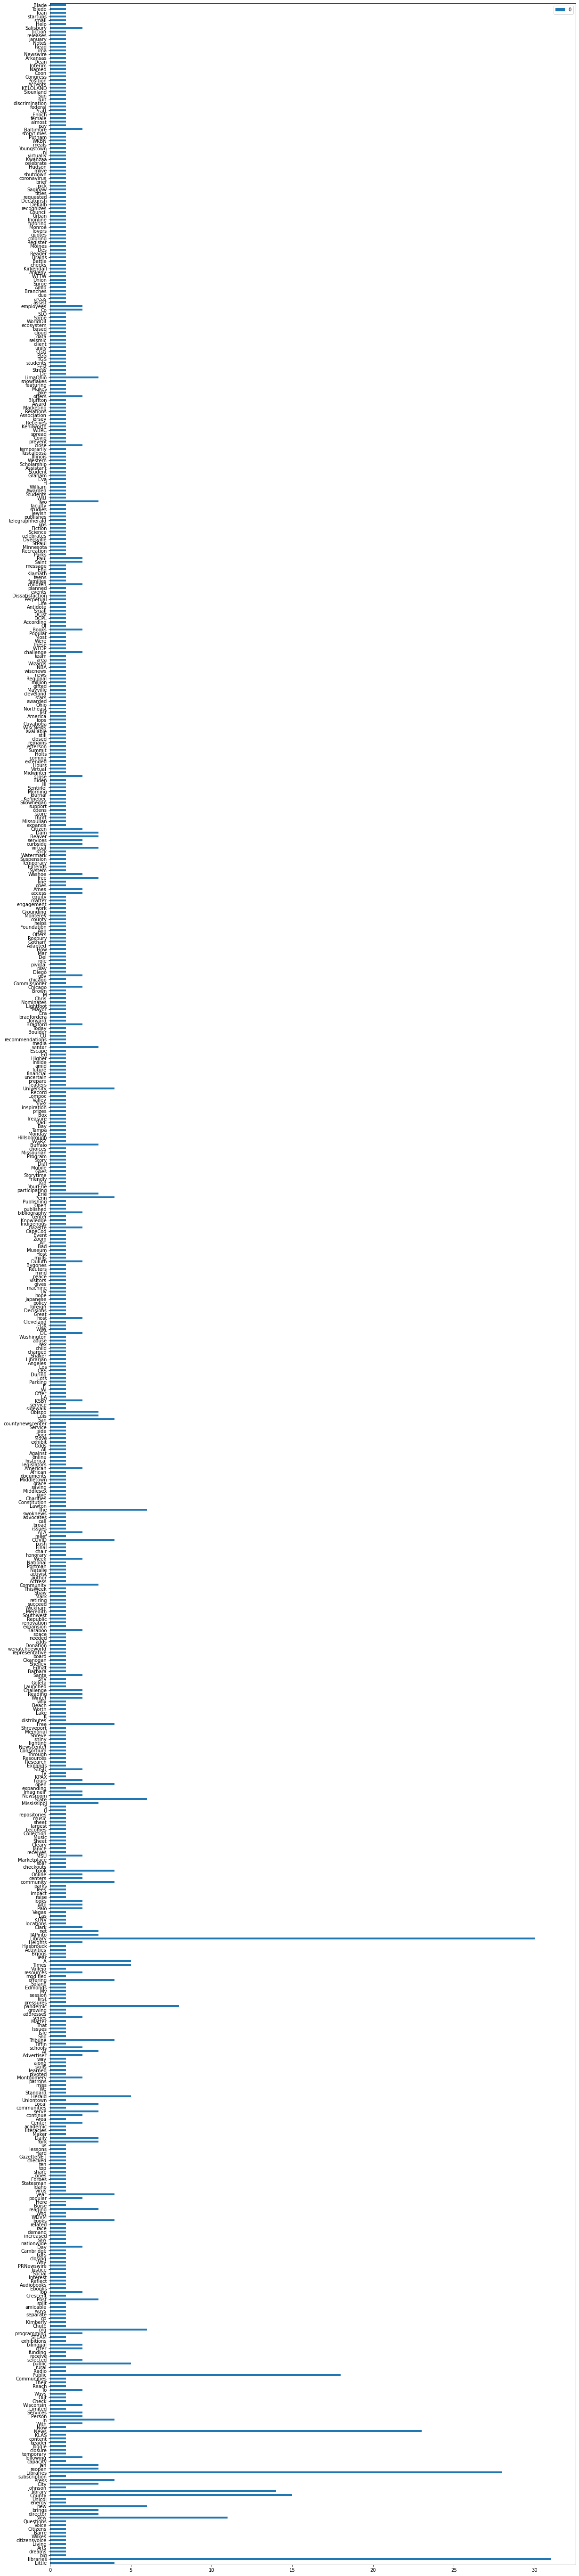

In [55]:
# import pandas
# a = ['a', 'a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'd', 'e', 'e', 'e', 'e', 'e']
letter_counts = Counter(wordlist)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
fig = df.plot(kind='barh',figsize=(20,100))
fig.figure.savefig('plot_lib_p2.jpeg')